In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
data = pd.read_csv("./NUCLEAR.csv")

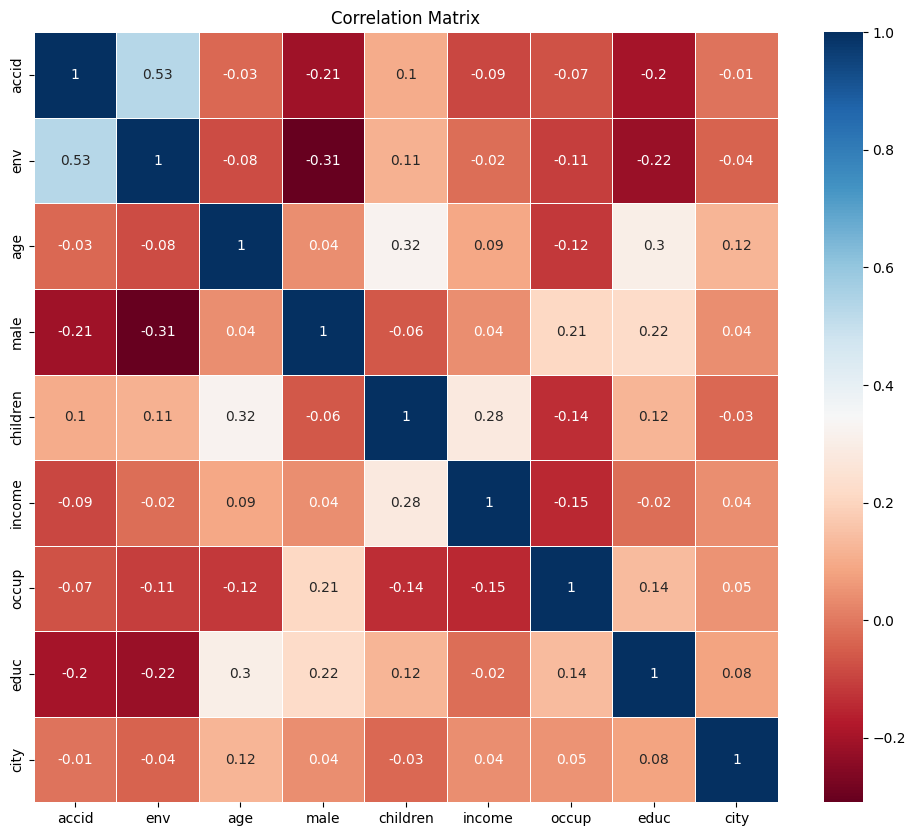

In [19]:
X = data.drop(columns=['support'])
Y = data['support']

# Correlation matrix
correlation_matrix = X.corr().round(2)

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [20]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [21]:
predictions = model.predict(X)

In [23]:
mse = mean_squared_error(Y, predictions)
sse = np.sum((Y - predictions) ** 2)
sst = np.sum((Y - np.mean(Y)) ** 2)
r2 = model.score(X, Y)
adjusted_r2 = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)

print(f'MSE: {mse}')
print(f'SSE: {sse}')
print(f'SSTO: {sst}')
print(f'R^2: {r2}')
print(f'Adjusted R^2: {adjusted_r2}')

MSE: 1.0281310946597826
SSE: 210.7668744052554
SSTO: 394.9951219512195
R^2: 0.4664063865799225
Adjusted R^2: 0.4417789890374574


In [24]:
residuals = Y - predictions

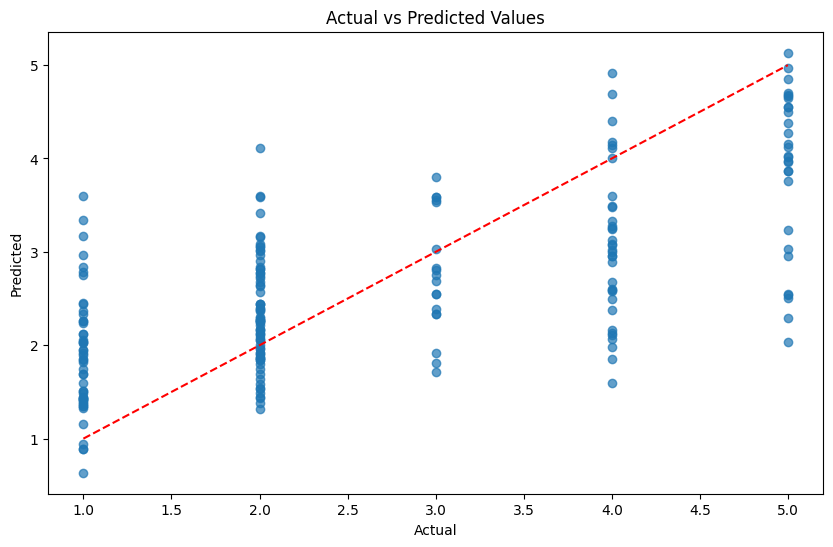

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(Y, predictions, alpha=0.7)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

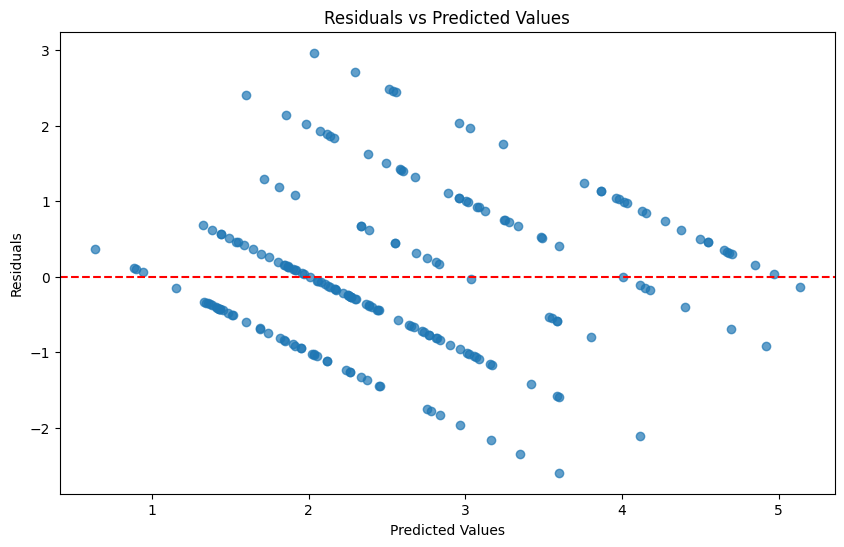

In [26]:
# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

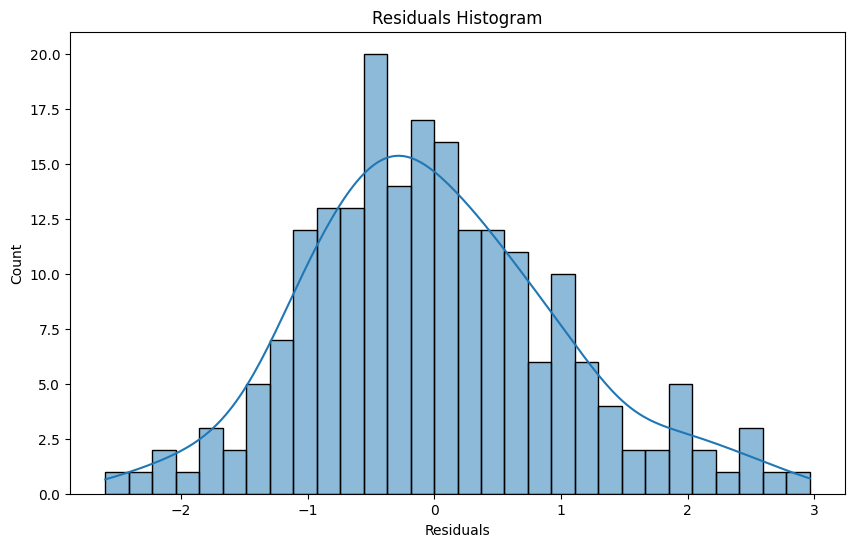

In [27]:
# Residual histogram
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Histogram')
plt.show()

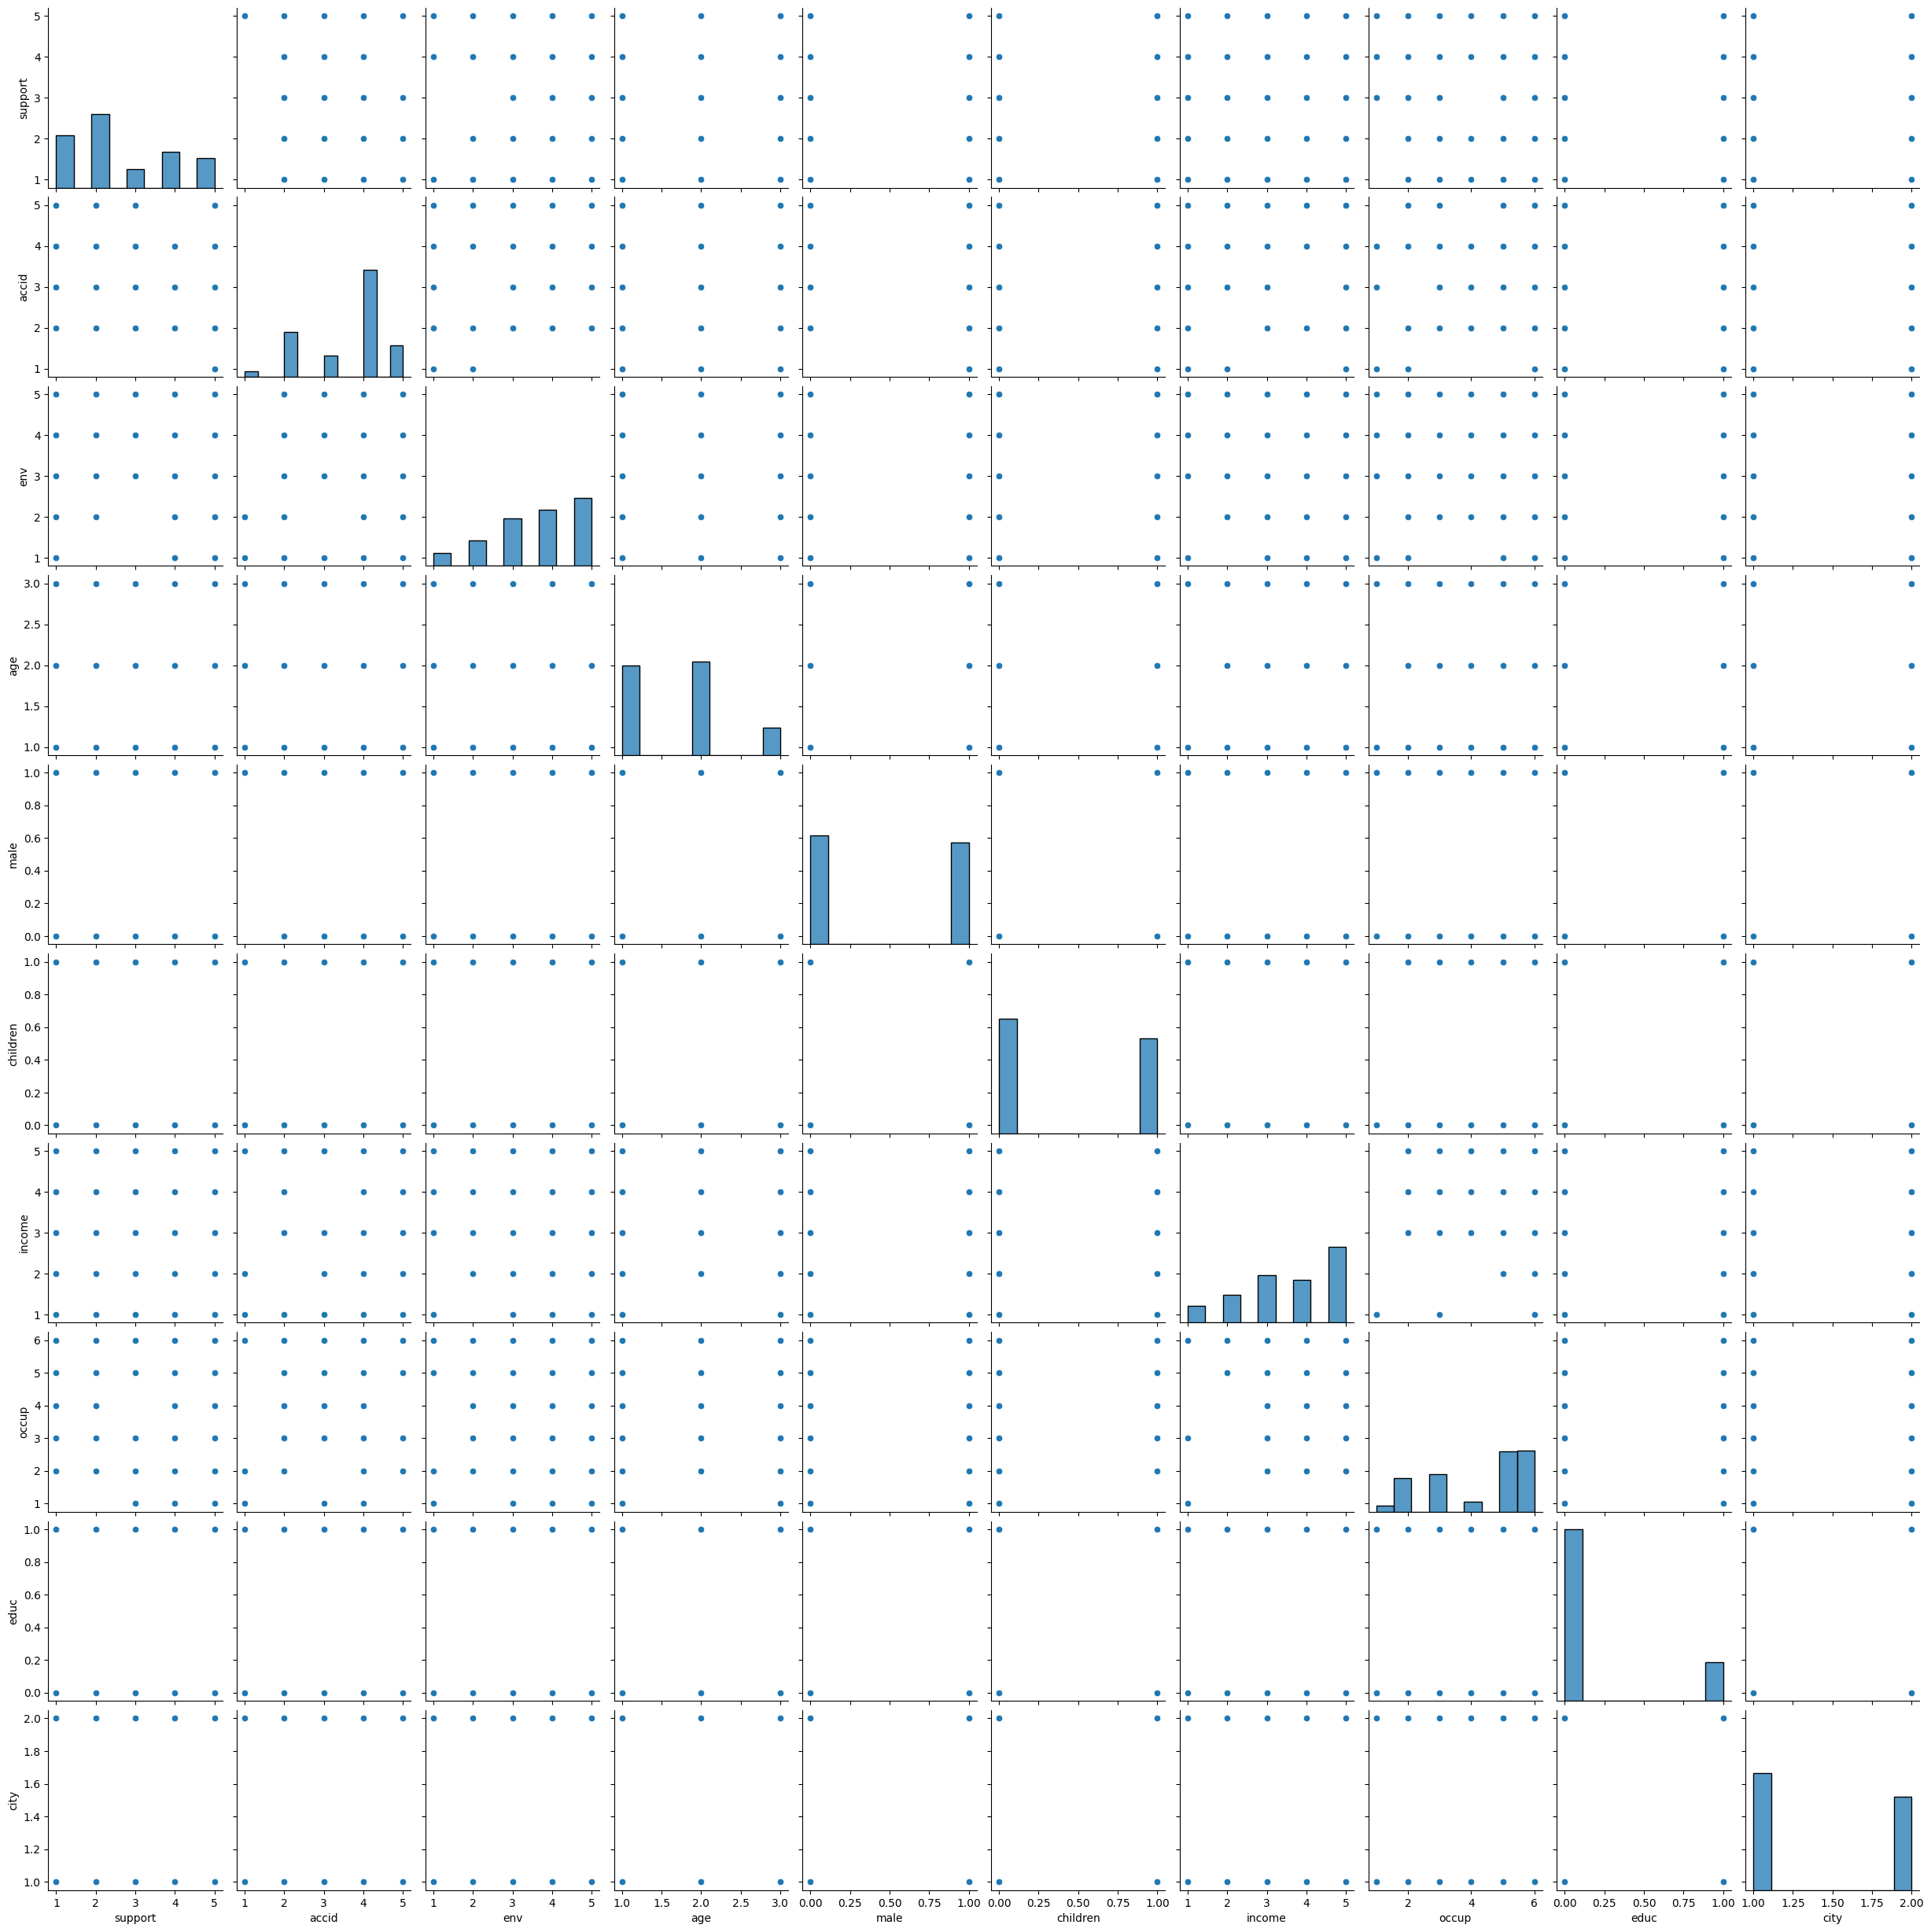

In [28]:
# Pairplot to visualize relationships
sns.pairplot(data)
plt.show()